# Pima indian diabetes


------------------------------

Import the necessary Packages

--------------------


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
datafrm=pd.read_csv('pima-indians-diabetes.CSV')

-----------------------------

Header is not there in CSV files so assigning the columns names sequentially to dataframe

-----------------

In [3]:
datafrm.columns=['pregnency','plasma','bloodpressure','skin','Insulin','BMI','pedigree','age','class']

In [4]:
#Class :-  
# 1 : Positive Diabetes Case   0: Negative Diabetes Case
datafrm.head()

,pregnency,plasma,bloodpressure,skin,Insulin,BMI,pedigree,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


-----------------------

Checking NUll Values 

--------------------

In [5]:
datafrm.isnull().sum()

pregnency        0
plasma           0
bloodpressure    0
skin             0
Insulin          0
BMI              0
pedigree         0
age              0
class            0
dtype: int64

------------------------------

To check outliers using bixplot.

Remove the outliers using zScore methode using threshold value 3

Also checking the corelations with our output column which is class

-----------------------------------------

In [6]:
datafrm.describe()

,pregnency,plasma,bloodpressure,skin,Insulin,BMI,pedigree,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


pregnency           AxesSubplot(0.125,0.536818;0.133621x0.343182)
plasma           AxesSubplot(0.285345,0.536818;0.133621x0.343182)
bloodpressure     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
skin             AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Insulin          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
BMI                    AxesSubplot(0.125,0.125;0.133621x0.343182)
pedigree            AxesSubplot(0.285345,0.125;0.133621x0.343182)
age                  AxesSubplot(0.44569,0.125;0.133621x0.343182)
class               AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

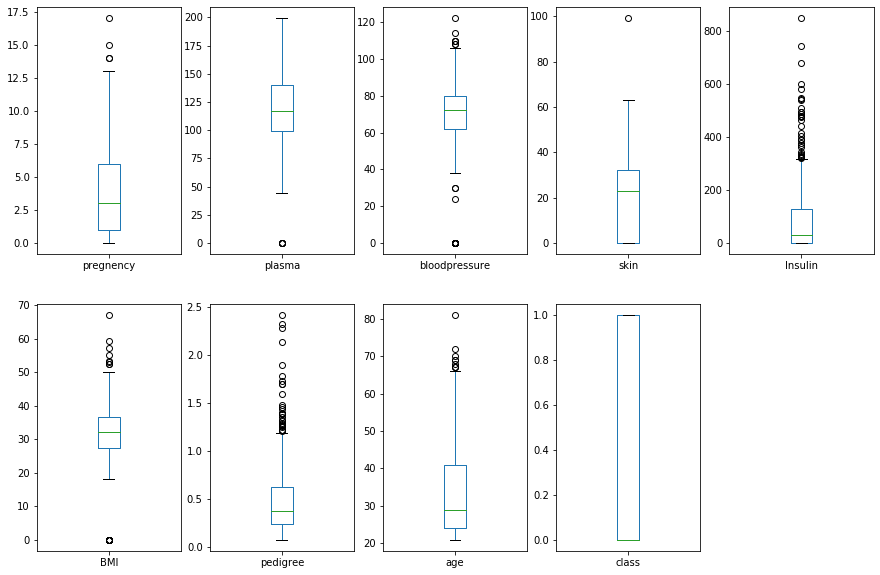

In [7]:
datafrm.plot(kind='box',subplots=True,layout=(2,5),figsize=(15,10))

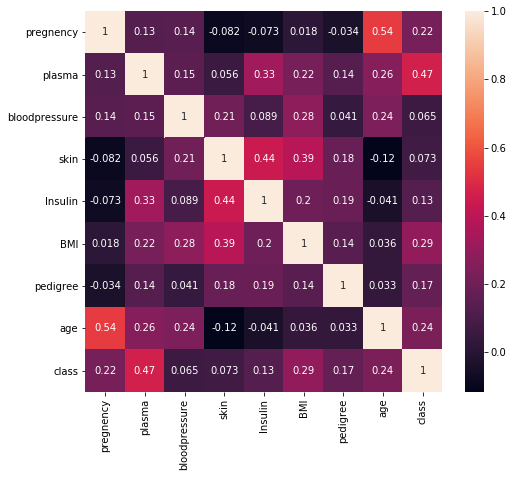

In [8]:
corr=datafrm.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True)
plt.show()


In [9]:
from scipy.stats import zscore

z=np.abs(zscore(datafrm))
threashold=3
print(np.where (z>3))



(array([  3,   6,   7,   8,  12,  14,  44,  48,  48,  57,  59,  59,  74,
        77,  80,  80,  87, 110, 122, 144, 152, 158, 171, 176, 181, 185,
       192, 219, 221, 227, 227, 246, 260, 265, 268, 285, 297, 299, 329,
       331, 335, 341, 346, 348, 356, 369, 369, 370, 370, 394, 408, 414,
       425, 425, 429, 434, 444, 444, 452, 452, 454, 458, 467, 483, 485,
       493, 493, 501, 521, 521, 532, 534, 578, 583, 588, 592, 600, 603,
       618, 620, 642, 644, 654, 665, 672, 683, 683, 694, 696, 702, 705,
       705, 752], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [10]:
datafrm.shape

(767, 9)

In [11]:
datafrm=datafrm[(z<3).all(axis=1)]

In [12]:
datafrm.shape

(687, 9)

-----------------------------------

Create x (input)  and y (output) to pass these values to our algo.

---------------

In [13]:
dfx=datafrm.iloc[:,:-1]
y=datafrm.iloc[:,-1]

In [14]:
y

0      0
1      1
2      0
4      0
5      1
      ..
762    0
763    0
764    0
765    1
766    0
Name: class, Length: 687, dtype: int64

 -------------------------------
 StandardScale for scaling x dataframe i.e Normalizing the dataset
 
 --------------

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)
x

,pregnency,plasma,bloodpressure,skin,Insulin,BMI,pedigree,age
0,-0.867175,-1.175613,-0.515432,0.534748,-0.806232,-0.847168,-0.363171,-0.181269
1,1.268127,2.092455,-0.677864,-1.348878,-0.806232,-1.345757,0.765319,-0.093694
2,-0.867175,-1.042223,-0.515432,0.145033,0.237466,-0.620537,-1.010031,-1.057021
3,0.352998,-0.141837,0.134296,-1.348878,-0.806232,-0.998256,-0.890503,-0.268844
4,-0.257089,-1.409047,-1.814887,0.729606,0.170847,-0.182383,-0.725272,-0.619145
...,...,...,...,...,...,...,...,...
682,1.878213,-0.642051,0.296728,1.768849,1.192338,0.104684,-0.995969,2.621136
683,-0.562132,0.058249,-0.190568,0.404843,-0.806232,0.693925,-0.401842,-0.531570
684,0.352998,0.024902,-0.028136,0.145033,0.437323,-0.907603,-0.735819,-0.268844
685,-0.867175,0.191640,-1.002727,-1.348878,-0.806232,-0.318362,-0.370202,1.219934


pregnency           AxesSubplot(0.125,0.536818;0.133621x0.343182)
plasma           AxesSubplot(0.285345,0.536818;0.133621x0.343182)
bloodpressure     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
skin             AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Insulin          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
BMI                    AxesSubplot(0.125,0.125;0.133621x0.343182)
pedigree            AxesSubplot(0.285345,0.125;0.133621x0.343182)
age                  AxesSubplot(0.44569,0.125;0.133621x0.343182)
dtype: object

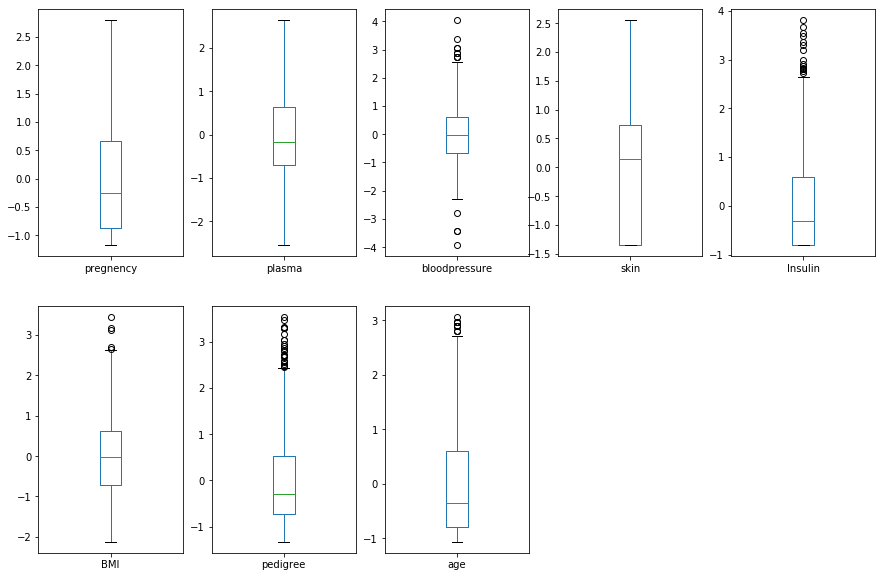

In [16]:
x.plot(kind='box',subplots=True,layout=(2,5),figsize=(15,10))

In [17]:
x.describe()

,pregnency,plasma,bloodpressure,skin,Insulin,BMI,pedigree,age
count,6.870000e+02,6.870000e+02,6.870000e+02,6.870000e+02,6.870000e+02,6.870000e+02,6.870000e+02,6.870000e+02
mean,2.133180e-17,7.142920e-17,-2.593752e-17,-2.424068e-17,-6.237934e-17,-7.728736e-16,1.503730e-16,1.662910e-16
std,1.000729e+00,1.000729e+00,1.000729e+00,1.000729e+00,1.000729e+00,1.000729e+00,1.000729e+00,1.000729e+00
min,-1.172218e+00,-2.542866e+00,-3.926502e+00,-1.348878e+00,-8.062321e-01,-2.116304e+00,-1.322915e+00,-1.057021e+00
25%,-8.671751e-01,-7.087464e-01,-6.778636e-01,-1.348878e+00,-8.062321e-01,-7.262980e-01,-7.358185e-01,-7.942953e-01
50%,-2.570888e-01,-1.751843e-01,-2.813595e-02,1.450325e-01,-3.176928e-01,-3.129514e-02,-2.963753e-01,-3.564195e-01
75%,6.580407e-01,6.251589e-01,6.215917e-01,7.296063e-01,5.927668e-01,6.183815e-01,5.297779e-01,6.069074e-01
max,2.793343e+00,2.626017e+00,4.032662e+00,2.548280e+00,3.801582e+00,3.443719e+00,3.539085e+00,3.059012e+00


-----------------------------------
Our Output Class is Binary so we will use Logistic Regression and other regression algorithms

----------------------------------------


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score



model_lst=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
    
def trn_tst_split(model,inpt,outpt,rs=0):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred_val=model.predict(x_test)
    return accuracy_score(y_test,pred_val)

for model in model_lst:
    d={}
    a=str(model)  
    a=a.split('(')[0]
    for i in range(0,100):
        scr = trn_tst_split(model,x,y,i)
        if scr > 0:
            d[i,a]=[scr*100]
        #        if scr > .82:
        #            print (a,'---------',i,'-------',scr)
    random_st = max(d , key=d.get)
    #print ('\nRandom_state with Model :',random_st,' Accurecy Score is :',(d[random_st]),'\n')
    scor=['precision','recall','f1','accuracy']
    lst=[]
    for i in scor:
        lrscore=cross_val_score(model,x,y,scoring=i,cv=15)
        lst.append((lrscore.mean()*100,lrscore.std()))
        #print('Scoreing Methode :', i,' Mean of Corss_val_Score :',lrscore.mean()*100,' & Std. Deviation :',lrscore.std())
    print ('------------Best Options for :',a,' Model ------------------')
    print ('\nRandom_state with Model :',random_st,' Accurecy Score is :',(d[random_st]),'\n')
    print('Scoreing Methode :', i,' Mean of Corss_val_Score :',max(lst)[0],' & Std. Deviation :',max(lst)[1])
    lst=[]
    print ('\n')

    

------------Best Options for : LogisticRegression  Model ------------------

Random_state with Model : (81, 'LogisticRegression')  Accurecy Score is : [88.40579710144928] 

Scoreing Methode : accuracy  Mean of Corss_val_Score : 78.46054750402577  & Std. Deviation : 0.04893694107505622


------------Best Options for : GaussianNB  Model ------------------

Random_state with Model : (81, 'GaussianNB')  Accurecy Score is : [84.78260869565217] 

Scoreing Methode : accuracy  Mean of Corss_val_Score : 75.70370370370372  & Std. Deviation : 0.046341729439787545


------------Best Options for : SVC  Model ------------------

Random_state with Model : (81, 'SVC')  Accurecy Score is : [83.33333333333334] 

Scoreing Methode : accuracy  Mean of Corss_val_Score : 77.29790660225443  & Std. Deviation : 0.05720711582115818


------------Best Options for : DecisionTreeClassifier  Model ------------------

Random_state with Model : (6, 'DecisionTreeClassifier')  Accurecy Score is : [78.26086956521739] 

S

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=81)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_val=lr.predict(x_test)
print ('------------LogisticRegression-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val))
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')


------------LogisticRegression-------------
Accurecy Score :  0.8840579710144928
Confusion Matrix : [[87  5]
 [11 35]]
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.95      0.92        92
           1       0.88      0.76      0.81        46

    accuracy                           0.88       138
   macro avg       0.88      0.85      0.86       138
weighted avg       0.88      0.88      0.88       138

---------------------------------------------------------
Error :
Mean Absolute Error :  0.11594202898550725
Mean Squared Error :  0.11594202898550725
Root Mean Squared Error :  0.34050261230349943
---------------


-----------------------------

Using cross_val_score methode so that all the dataset will be consider for Training purpose as with total set of CV value and will check the average of mean values of all CV set. CV is nothing but kfold value

------------------------------

In [20]:
print ('------------LogisticRegression-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val))
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))

------------LogisticRegression-------------
Accurecy Score :  0.8840579710144928
Confusion Matrix : [[87  5]
 [11 35]]
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.95      0.92        92
           1       0.88      0.76      0.81        46

    accuracy                           0.88       138
   macro avg       0.88      0.85      0.86       138
weighted avg       0.88      0.88      0.88       138



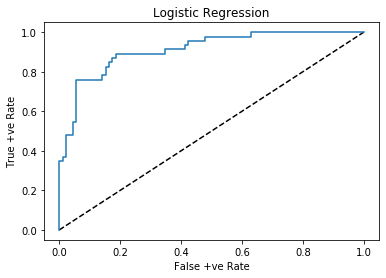

In [21]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')  # X and Y axis value 0 to 1 
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Logistic Regression')
plt.show()


In [22]:
rocaucscore=roc_auc_score(y_test,y_pred_prob)
print(rocaucscore)
   
   



NameError: name 'roc_auc_score' is not defined

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=19,stratify=y)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_val=lr.predict(x_test)
print ('------------LogisticRegression-------------')
print ('Accurecy Score : ',accuracy_score(y_test,pred_val))
print ('Confusion Matrix :',confusion_matrix(y_test,pred_val))
print ('Classification Report :',classification_report(y_test,pred_val))
print('---------------------------------------------------------')
print('Error :')
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred_val))
print('Mean Squared Error : ',mean_squared_error(y_test,pred_val))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_val)))
print ('---------------')

---------------------------
ROC AUC score is high 91%

Cross Validation Score is 78% and logistic model's score is 88%

# ------------Questions-------------------
#  If I am using 'stratify=y' while train_test_split , I am  getting less score ie 83%

# If I am not using 'stratify=y' while train_test_split ,I am getting 88% score  so which methode we should use? With or without "stratify" ?

# I am not Using stratify then 
# I am Not sure about Overfitting in our model. Need to ask as there is 10% gap in between Cross validation value and Accurecy Score of logistic model.

----------------------------------

----------------------
Maximum Accurecy score is 88% using Logistic Regression,So we are saving that model as .obj file for further use

-----------------------

In [ ]:
import joblib
joblib.dump(lr,'pima-indians-diabetes.obj')
#or
joblib.dump(lr,'pima-indians-diabetes.pkl')